<a href="https://colab.research.google.com/github/dmaresza/tensorflow_course/blob/main/03_TensorFlow_CNNs_and_Computer_Vision_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. Convolutional Neural Networks and Computer Vision in TensorFlow

## 1. Spend 20 minues reading and interacting with the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* What are the key terms (e.g. explain convolution in your own words, pooling in your own words)?

Convolution is the process through which a convolutional neural network learns patterns in images. In a convolutional layer, a kernel or filter is a small "window" that steps through an image and performs a convolutional operation at each step. This convolutional operation takes each pixel in the "window" and multiplies it by a weight associated with the kernel, then adds up all the values and outputs the result as a single number, or a "new" pixel. The kernel then steps over to the next set of pixels and performs the operation again. Depending on the kernel size and the size of the step (stride), the same pixels may be involved in multiple convolutional operations. After the kernerl has stepped through the entire image, the final output is a 2-dimensional tensor whose values can hopefully be used to determine the contents of the image.

Pooling is a way to reduce the size of the outputs and keep only the most important features. In the CNN Explainer website, the CNN model architecture uses Max-Pooling. In Max-Pooling, a kernel is again applied to the output of a convolutional layer, but this time the output is simply the maximum value among the pixels in the kernel, instead of a sum of multiplied values. In the end the size of the output is much smaller than the input, but it consists of the most important features which can be used to determine the contents of the image.

## 2. Play around with the "understanding hyperparameters" section in the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website for 10 minutes.

* What is the kernel size?
* What is the stride?
* How could you adjust each of these in TensorFlow code?

The kernel size changes the size of the "sliding window" that moves across an image. A kernel size of 2 creates a window that looks at 4 pixels at a time, while a kernel size of 4 creates a window that looks at 16 pixels at a time. A smaller kernel size allows a neuron to extract more information from the image and find more detailed features, while a larger kernel size extracts less information overall, but can be useful to extract features that are larger.

The stride is the number of pixels by which the kernel steps through an image. A stride of one means that the kernel moves over one pixel at a time, which also results in more information extracted overall since there are more total convolutional operations. The stride should not be larger than the kernel size, otherwise the kernel will skip over certain pixels and miss out on potentially useful information.

Kernel size and stride are both hyperparameters that can be adjusted when creating a CNN by passing the desired values as parameters to a Conv2D layer.

```python
model = tf.layers.Sequential([
  tf.keras.layers.Conv2D(kernel_size=X, strides=Y)
])
```

## 3. Take 10 photos of two different things and build your own CNN image classifier using the techniques we've used here.

In [1]:
# Getting images of pizza and steak
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

!rm pizza_steak.zip

--2024-07-08 19:42:32--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   125MB/s    in 0.8s    

2024-07-08 19:42:33 (125 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [2]:
import os
import random

# Get 10 random images from each class
random_pizza_images = random.sample(os.listdir("pizza_steak/train/pizza"), 10)
random_steak_images = random.sample(os.listdir("pizza_steak/train/steak"), 10)

os.makedirs("binary_classification/pizza", exist_ok=True)
os.makedirs("binary_classification/steak", exist_ok=True)

# Move images to new directory
for path in random_pizza_images:
  pathname = "pizza_steak/train/pizza/" + path
  !mv {pathname} binary_classification/pizza/

for path in random_steak_images:
  pathname = "pizza_steak/train/steak/" + path
  !mv {pathname} binary_classification/steak/

# Remove rest of images
!rm -rf pizza_steak

In [40]:
# Create train and validation/test data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.,
                                   validation_split=0.5)

train_data = train_datagen.flow_from_directory("binary_classification",
                                               batch_size=2,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42,
                                               subset='training')

valid_data = train_datagen.flow_from_directory("binary_classification",
                                               batch_size=2,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               seed=42,
                                               subset='validation')

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [42]:
# Create CNN model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=5,
                           kernel_size=2,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(5, 2, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch=len(train_data),
                    validation_data=valid_data,
                    validation_steps=len(valid_data))

Epoch 1/5
5/5 [==============================] - 2s 55ms/step - loss: 0.9951 - accuracy: 0.5000 - val_loss: 0.6056 - val_accuracy: 0.8000
Epoch 2/5
5/5 [==============================] - 0s 21ms/step - loss: 0.4932 - accuracy: 0.8000 - val_loss: 0.5815 - val_accuracy: 0.5000
Epoch 3/5
5/5 [==============================] - 0s 25ms/step - loss: 0.3175 - accuracy: 0.9000 - val_loss: 0.5076 - val_accuracy: 0.6000
Epoch 4/5
5/5 [==============================] - 0s 22ms/step - loss: 0.1985 - accuracy: 1.0000 - val_loss: 0.5034 - val_accuracy: 0.8000
Epoch 5/5
5/5 [==============================] - 0s 25ms/step - loss: 0.1441 - accuracy: 1.0000 - val_loss: 0.5483 - val_accuracy: 0.8000


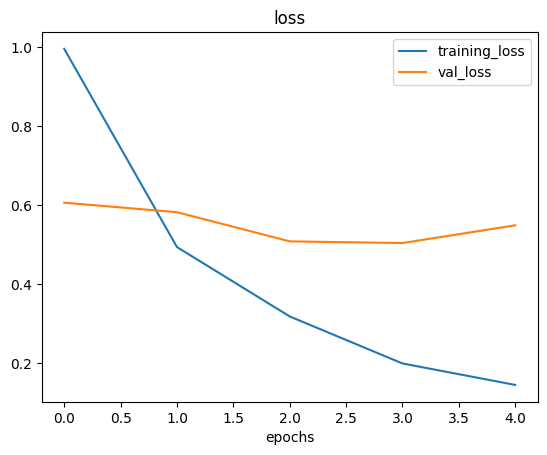

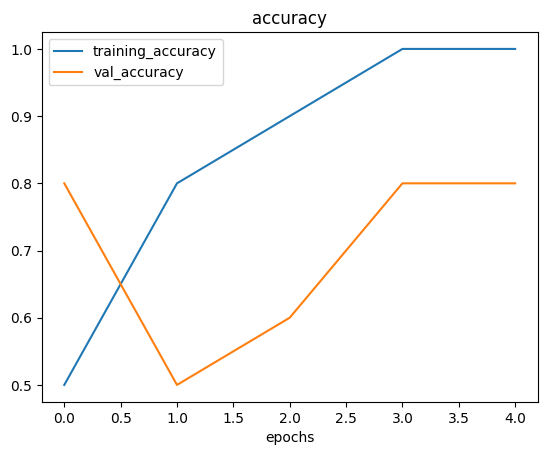

In [43]:
# Display loss and accuracy curves
import matplotlib.pyplot as plt

loss = history.history["loss"]
val_loss = history.history["val_loss"]

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

epochs = range(len(history.history["loss"])) # how many epochs did we run for?

# Plot loss
plt.plot(epochs, loss, label="training_loss")
plt.plot(epochs, val_loss, label="val_loss")
plt.title("loss")
plt.xlabel("epochs")
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label="training_accuracy")
plt.plot(epochs, val_accuracy, label="val_accuracy")
plt.title("accuracy")
plt.xlabel("epochs")
plt.legend();

This is a very small amount of data (10 training images and 10 test images), but the model seems to perform alright, although it might be overfitting a little.

## 4. Find an ideal learning rate for a simple convolutional neural network model on the 10-class dataset.

In [44]:
# Get the 10-class 10% dataset
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

!rm 10_food_classes_10_percent.zip

--2024-07-08 19:49:37--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.207, 74.125.20.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   181MB/s    in 0.9s    

2024-07-08 19:49:38 (181 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [60]:
# Set up the train and test directories
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data_10_classes = train_datagen.flow_from_directory(train_dir,
                                                          target_size=(224, 224),
                                                          batch_size=32,
                                                          class_mode="categorical")

test_data_10_classes= test_datagen.flow_from_directory(test_dir,
                                                       target_size=(224, 224),
                                                       batch_size=32,
                                                       shuffle=False,
                                                       class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [65]:
# Create new model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/2))

history_2 = model_2.fit(train_data_10_classes,
                        epochs=10,
                        steps_per_epoch=len(train_data_10_classes),
                        validation_data=test_data_10_classes,
                        validation_steps=len(test_data_10_classes),
                        callbacks=[lr_scheduler])

Epoch 1/10
24/24 [==============================] - 10s 376ms/step - loss: 2.3080 - accuracy: 0.1040 - val_loss: 2.2929 - val_accuracy: 0.1384 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 8s 349ms/step - loss: 2.2642 - accuracy: 0.1573 - val_loss: 2.2602 - val_accuracy: 0.1624 - lr: 3.1623e-04
Epoch 3/10
24/24 [==============================] - 9s 373ms/step - loss: 2.1291 - accuracy: 0.2240 - val_loss: 2.2957 - val_accuracy: 0.1936 - lr: 0.0010
Epoch 4/10
24/24 [==============================] - 9s 372ms/step - loss: 1.9864 - accuracy: 0.3160 - val_loss: 2.6652 - val_accuracy: 0.1680 - lr: 0.0032
Epoch 5/10
24/24 [==============================] - 12s 527ms/step - loss: 2.3814 - accuracy: 0.2600 - val_loss: 2.3409 - val_accuracy: 0.1196 - lr: 0.0100
Epoch 6/10
24/24 [==============================] - 8s 356ms/step - loss: 3.9840 - accuracy: 0.1027 - val_loss: 2.3069 - val_accuracy: 0.1000 - lr: 0.0316
Epoch 7/10
24/24 [==============================] - 9s 362ms

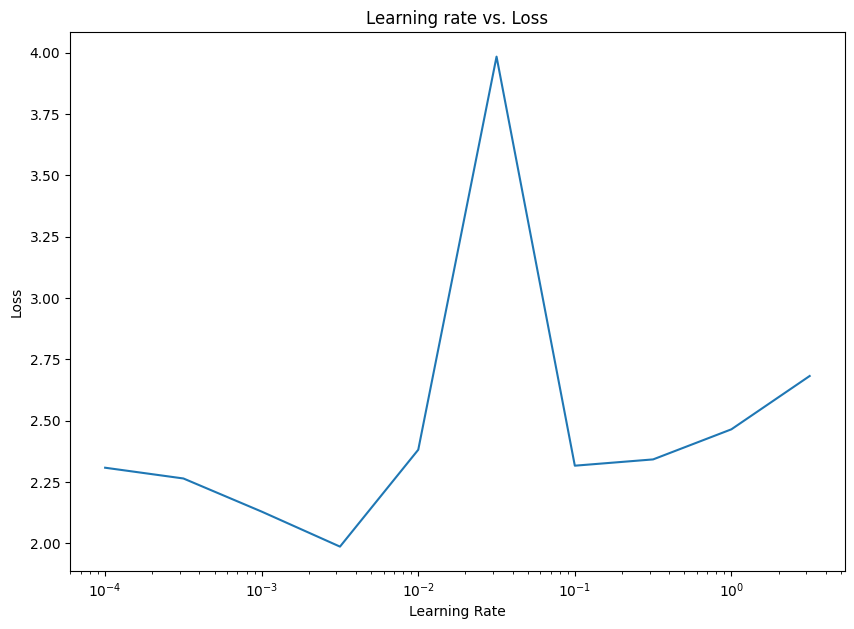

In [66]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(10)/2))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. Loss");

Looks like the ideal learning rate for this model is ~0.002.

In [67]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=.002),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data_10_classes,
                        epochs=10,
                        steps_per_epoch=len(train_data_10_classes),
                        validation_data=test_data_10_classes,
                        validation_steps=len(test_data_10_classes))

Epoch 1/10
24/24 [==============================] - 10s 349ms/step - loss: 2.3886 - accuracy: 0.1080 - val_loss: 2.2911 - val_accuracy: 0.1508
Epoch 2/10
24/24 [==============================] - 9s 377ms/step - loss: 2.1960 - accuracy: 0.2040 - val_loss: 2.3021 - val_accuracy: 0.1524
Epoch 3/10
24/24 [==============================] - 9s 381ms/step - loss: 1.8448 - accuracy: 0.3760 - val_loss: 2.3392 - val_accuracy: 0.1812
Epoch 4/10
24/24 [==============================] - 9s 364ms/step - loss: 1.2114 - accuracy: 0.6107 - val_loss: 2.7487 - val_accuracy: 0.1924
Epoch 5/10
24/24 [==============================] - 9s 364ms/step - loss: 0.6630 - accuracy: 0.8027 - val_loss: 3.6075 - val_accuracy: 0.1736
Epoch 6/10
24/24 [==============================] - 9s 376ms/step - loss: 0.2263 - accuracy: 0.9467 - val_loss: 4.3675 - val_accuracy: 0.1768
Epoch 7/10
24/24 [==============================] - 11s 467ms/step - loss: 0.0520 - accuracy: 0.9947 - val_loss: 4.9601 - val_accuracy: 0.1872
Epoc

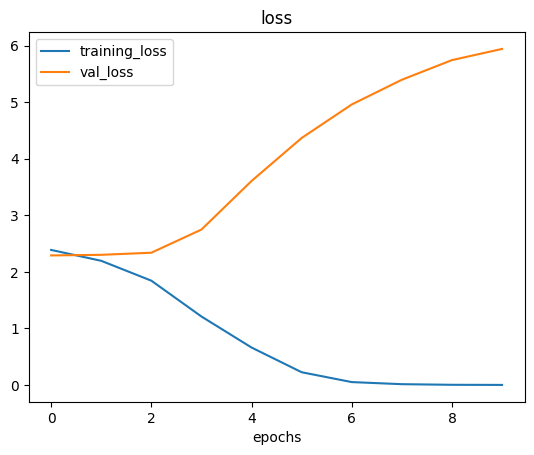

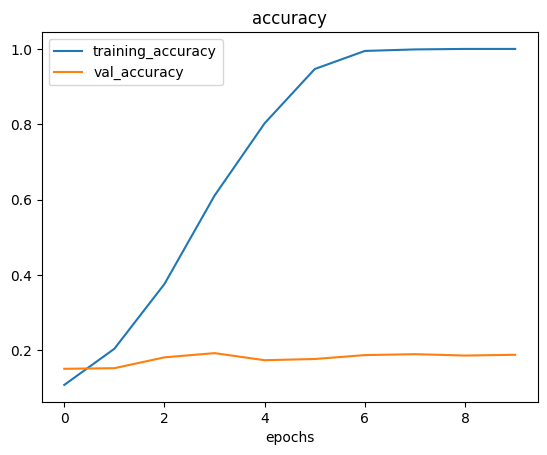

In [68]:
loss = history_3.history["loss"]
val_loss = history_3.history["val_loss"]

accuracy = history_3.history["accuracy"]
val_accuracy = history_3.history["val_accuracy"]

epochs = range(len(history_3.history["loss"])) # how many epochs did we run for?

# Plot loss
plt.plot(epochs, loss, label="training_loss")
plt.plot(epochs, val_loss, label="val_loss")
plt.title("loss")
plt.xlabel("epochs")
plt.legend()

# Plot accuracy
plt.figure()
plt.plot(epochs, accuracy, label="training_accuracy")
plt.plot(epochs, val_accuracy, label="val_accuracy")
plt.title("accuracy")
plt.xlabel("epochs")
plt.legend();

The learning rate of 0.002 helps both the train loss and train accuracy, but the validation accuracy remains the same and the validation loss is increasing, which means the model is likely overfitting on the training data and isn't learning generalizable patterns.